# Titanic Dataset
[Kaggle](https://www.kaggle.com/c/titanic)

Data located at `~/.kaggle/competitions/titanic`

To install run:
`kaggle competitions download -c titanic`

## Goals of this Investigation
Predict if a passenger survived the sinking of the ship, or not. Supervised Learning, Binary Classifier.


In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./titanic_train.csv')
test = pd.read_csv('./titanic_train.csv')

## Exploring The Data

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [36]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


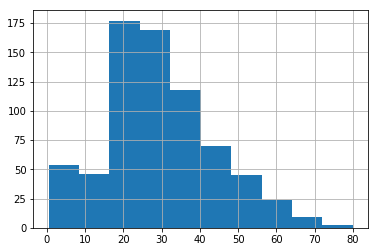

In [18]:
ages = train['Age']
ages.hist()

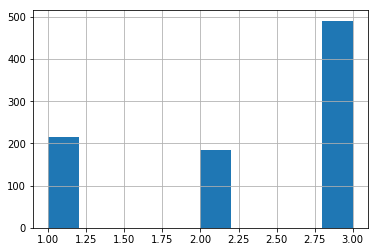

In [27]:
Pclass = train['Pclass']
Pclass.hist()

In [40]:
Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

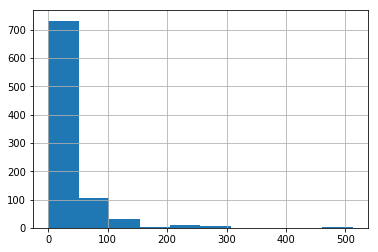

In [29]:
fare = train['Fare']
fare.hist()

In [32]:
type(fare)

pandas.core.series.Series

In [41]:
embarked = train['Embarked']
embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Data Preprocessing
Some things we could try:

* One Hot encode embarked
* decode cabin floor/section
* (complex) Decode name to attempt to find nationality or other demographics
* Fill In Missing Age Data (and other missing data)

Everything will be done in an automagic pipeline.